# Exemples en électronique

##Oscillateur

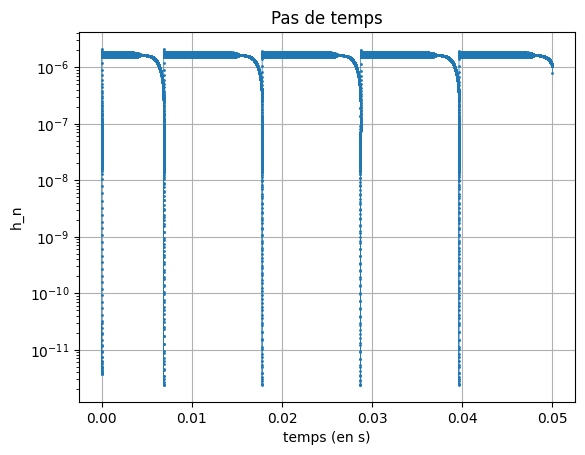

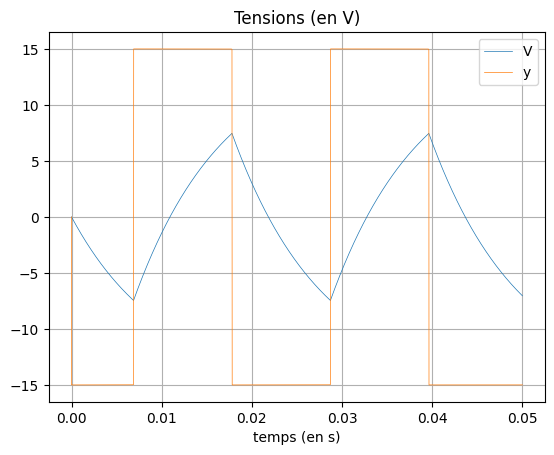

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 25 14:02:15 2015

@author: Collette
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def ampli(epsilon):
    global V_cc
    return V_cc*np.arctan(10000*(epsilon-1e-9))/(np.pi/2)


def ode_oscillateur(x, V_cc, C, C_A, R):
    V = x[0]
    epsilon = x[1]
    sortie_ampli = ampli(epsilon)
    xp0 = (2*sortie_ampli-3*V-2*epsilon)/(R*C)
    xp1 = (sortie_ampli-2*V-2*epsilon)/(R*C_A)
    return np.array([xp0, xp1])


V_cc = 15
C = 1e-6
C_A = 1e-10
R = 10e3
t_start = 0.0
t_final = 0.05
delta_t = 1e-6
x0 = [0, 0]
sol = solve_ivp(lambda t, x: ode_oscillateur(x, V_cc, C, C_A, R), [
                0, t_final], x0, rtol=1e-10, atol=1e-10)
t = sol.t.T
x = sol.y.T
plt.figure()
plt.semilogy(t[0:-1], np.diff(t), 'o-', lw=0.5, ms=1)
plt.grid('on')
plt.title('Pas de temps')
plt.xlabel('temps (en s)')
plt.ylabel('h_n')

V = x[:, 0]
y = ampli(x[:, 1])
plt.figure()
pt = plt.plot(t, V, t, y, lw=0.5)
plt.grid('on')
plt.title('Tensions (en V)')
plt.xlabel('temps (en s)')
plt.legend(pt, ['V', 'y'])
plt.show()


##Convertisseur résonnant

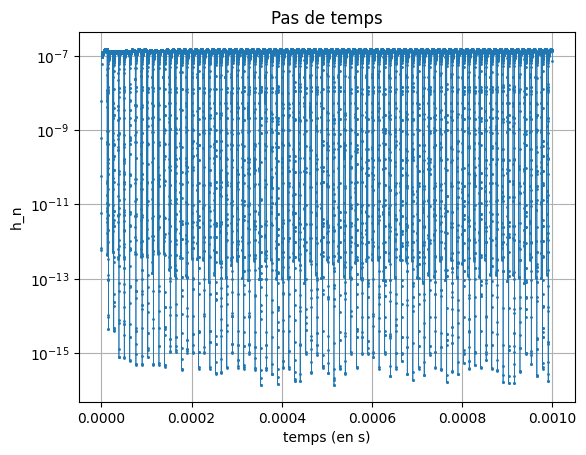

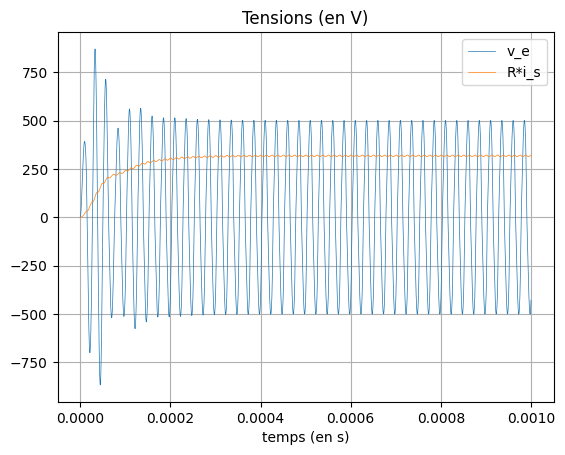

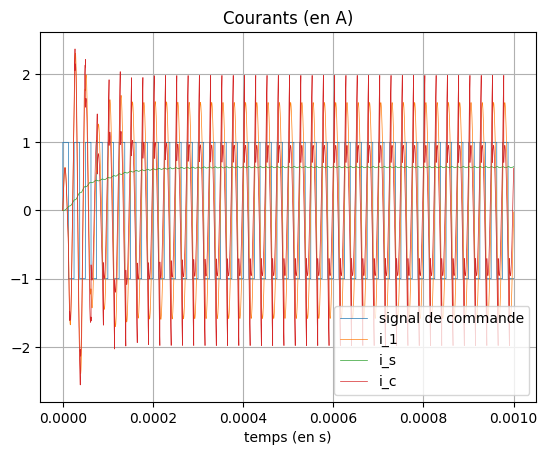

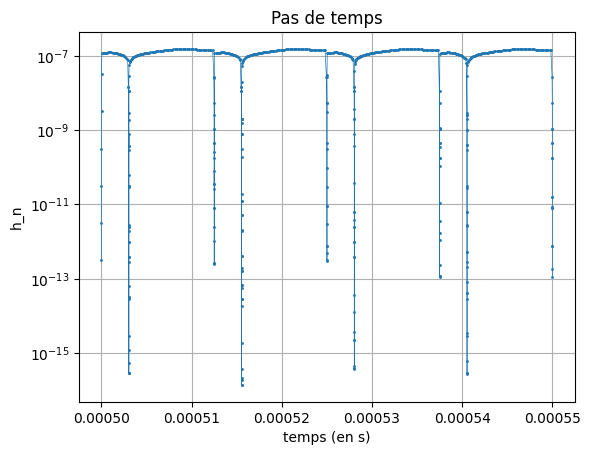

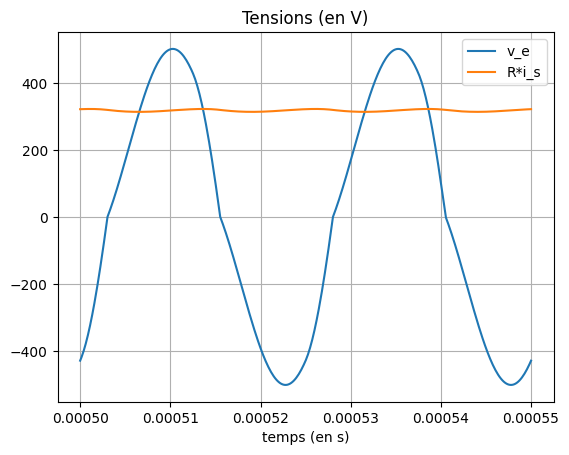

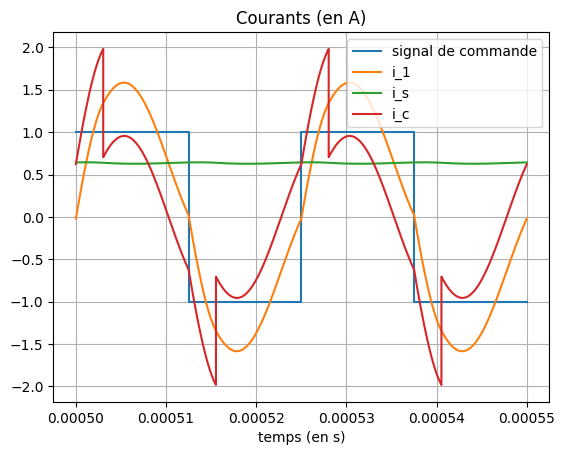

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon May 25 14:02:15 2015

@author: Collette
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def ode_convres(t, x, c, l1, L, R, r1, fh):
    ve = x[0]
    i_1 = x[1]
    i_s = x[2]
    E = 200*np.sign(np.sin(2*np.pi*fh*t))
    xp0 = (1/c)*(i_1-i_s*np.sign(ve))
    xp1 = (1/l1)*(E-ve-r1*i_1)
    xp2 = (1/L)*(abs(ve)-R*i_s)
    return np.array([xp0, xp1, xp2])


c = 1e-8
l1 = 1e-3
L = 5e-2
R = 500
r1 = 0.02
fh = 40000
t_start = 0.0
t_final = 1e-3
t_deb = 5e-4
t_fin = 5.5e-4
delta_t = 1e-7
x0 = [0, 0, 0]

sol = solve_ivp(lambda t, x: ode_convres(t, x, c, l1, L, R, r1, fh), [
                t_start, t_final], x0, rtol=1e-10, atol=1e-10)
t = sol.t.T
x = sol.y.T
ind_extr = np.where(np.logical_and(t >= t_deb, t <= t_fin))[0]
ve = x[:, 0]
i_1 = x[:, 1]
i_s = x[:, 2]
tensions = np.zeros((len(t), 2))
courants = np.zeros((len(t), 4))
tensions[:, 0] = ve
tensions[:, 1] = R*i_s
courants[:, 0] = np.sign(np.sin(2*np.pi*fh*t))
courants[:, 1] = i_1
courants[:, 2] = i_s
courants[:, 3] = i_1-i_s*np.sign(ve)

plt.figure()
plt.semilogy(t[0:-1], np.diff(t), 'o-', lw=0.5, ms=1)
plt.grid('on')
plt.title('Pas de temps')
plt.xlabel('temps (en s)')
plt.ylabel('h_n')

plt.figure()
pt = plt.plot(t, tensions, lw=0.5)
plt.grid('on')
plt.title('Tensions (en V)')
plt.xlabel('temps (en s)')
plt.legend(pt, ['v_e', 'R*i_s'])

plt.figure()
pt = plt.plot(t, courants, lw=0.5)
plt.grid('on')
plt.title('Courants (en A)')
plt.xlabel('temps (en s)')
plt.legend(pt, ['signal de commande', 'i_1', 'i_s', 'i_c'])

plt.figure()
plt.semilogy(t[ind_extr[0:-1]], np.diff(t[ind_extr]), 'o-', lw=0.5, ms=1)
plt.grid('on')
plt.title('Pas de temps')
plt.xlabel('temps (en s)')
plt.ylabel('h_n')

plt.figure()
pt = plt.plot(t[ind_extr], tensions[ind_extr, :])
plt.grid('on')
plt.title('Tensions (en V)')
plt.xlabel('temps (en s)')
plt.legend(pt, ['v_e', 'R*i_s'])

plt.figure()
pt = plt.plot(t[ind_extr], courants[ind_extr, :])
plt.grid('on')
plt.title('Courants (en A)')
plt.xlabel('temps (en s)')
plt.legend(pt, ['signal de commande', 'i_1', 'i_s', 'i_c'])

plt.show()
